In [1]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt

# increase the size and quality of any plots we produce
import matplotlib as mpl


In [2]:
#read text file through same directory with pandas

df = pd.read_table("fhlmc_sf2019a_loans.txt")
df.head()

,2 1 1 2 3 3 2 1 4 9 9 1 2 1 4
0,2 2 0 2 2 3 2 8 4 5 9 1 5 1 4
1,2 3 1 1 2 3 2 1 4 5 9 1 5 1 4
2,2 4 1 1 3 3 2 8 4 5 9 1 5 1 4
3,2 5 1 2 2 3 2 8 4 5 5 1 2 1 4
4,2 6 1 1 3 3 2 1 4 5 5 1 2 1 4


In [3]:
#reading what the dataframe looks like... looks like a whole lot of nothing right now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628964 entries, 0 to 1628963
Data columns (total 1 columns):
 #   Column                               Non-Null Count    Dtype 
---  ------                               --------------    ----- 
 0   2       1 1 2 3 3 2 1 4 9 9 1 2 1 4  1628964 non-null  object
dtypes: object(1)
memory usage: 12.4+ MB


In [4]:
#adding a column name to only available column in dataset
df.columns = ["First Column"]
df.head()

,First Column
0,2 2 0 2 2 3 2 8 4 5 9 1 5 1 4
1,2 3 1 1 2 3 2 1 4 5 9 1 5 1 4
2,2 4 1 1 3 3 2 8 4 5 9 1 5 1 4
3,2 5 1 2 2 3 2 8 4 5 5 1 2 1 4
4,2 6 1 1 3 3 2 1 4 5 5 1 2 1 4


In [5]:
#splitting up all the numbers from first column by space delimiter
df_1 = df["First Column"].str.split(" ", expand = True)
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2,,,,,,,2,0,2,...,3,2,8,4,5,9,1,5,1,4
1,2,,,,,,,3,1,1,...,3,2,1,4,5,9,1,5,1,4
2,2,,,,,,,4,1,1,...,3,2,8,4,5,9,1,5,1,4
3,2,,,,,,,5,1,2,...,3,2,8,4,5,5,1,2,1,4
4,2,,,,,,,6,1,1,...,3,2,1,4,5,5,1,2,1,4


In [6]:
#dropping first 8 lines due to the odd split in data 
df_1 = df_1.drop([0,1,2,3,4,5,6,7])
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
8,2,,,,,,10,1,3,3,...,4,1,4,7,7,1,2,1,4,None
9,2,,,,,,11,1,3,2,...,2,1,4,5,5,1,2,1,4,None
10,2,,,,,,12,0,1,2,...,1,8,4,5,5,1,2,1,4,None
11,2,,,,,,13,1,3,3,...,2,1,4,1,9,2,5,1,4,None
12,2,,,,,,14,1,2,2,...,1,8,4,5,5,2,1,1,3,None


In [7]:
#splitting up dataset to different datasets
#had come to a realization earlier on that because a space delimiter was added to the data, each time the rows
#introduced an extra digit, all of my data shifted therefore the only way out of it was to split up the data like this:
df_2 = df_1.iloc[:997,:]
df_3 = df_1.iloc[998:9997,:]
df_4 = df_1.iloc[9998:99997,:]
df_5 = df_1.iloc[99998:999997,:]
df_5.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
100006,2,,100008,1,2,2,3,4,1,4,...,5,2,1,1,4,None,None,None,None,None
100007,2,,100009,1,1,3,3,3,1,4,...,6,1,2,1,4,None,None,None,None,None
100008,2,,100010,1,3,2,3,2,1,4,...,5,1,2,1,4,None,None,None,None,None
100009,2,,100011,1,3,1,3,5,8,4,...,9,1,5,1,4,None,None,None,None,None
100010,2,,100012,1,3,2,3,3,1,4,...,9,3,5,1,4,None,None,None,None,None


In [8]:
#dropping above empty columns in df_3
df_3 = df_3.drop([1,2,3,18,19,20], axis=1)
df_3.head()

,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1006,2,1008,1,3,2,3,2,8,4,3,9,2,5,1,4
1007,2,1009,0,1,2,3,3,1,4,5,9,1,5,1,4
1008,2,1010,1,1,3,3,4,1,4,5,9,1,5,1,4
1009,2,1011,1,3,1,3,2,8,4,7,9,1,5,1,4
1010,2,1012,1,2,3,3,2,8,4,5,5,1,2,1,4


In [9]:
#dropping above empty columns in df_4
df_4 = df_4.drop([1,2,17,18,19,20], axis=1)
df_4.head()

,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16
10006,2,10008,1,3,2,3,3,1,4,5,9,1,5,1,4
10007,2,10009,1,2,1,3,1,8,4,7,9,2,5,1,4
10008,2,10010,0,1,2,3,2,1,4,5,5,2,1,1,4
10009,2,10011,1,1,2,2,2,8,4,5,9,2,5,1,4
10010,2,10012,1,3,2,3,4,1,4,5,5,2,1,1,4


In [10]:
#dropping above empty columns in df_5
df_5 = df_5.drop([1,16,17,18,19,20], axis=1)
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899999 entries, 100006 to 1000004
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       899999 non-null  object
 1   2       899999 non-null  object
 2   3       899999 non-null  object
 3   4       899999 non-null  object
 4   5       899999 non-null  object
 5   6       899999 non-null  object
 6   7       899999 non-null  object
 7   8       899999 non-null  object
 8   9       899999 non-null  object
 9   10      899999 non-null  object
 10  11      899999 non-null  object
 11  12      899999 non-null  object
 12  13      899999 non-null  object
 13  14      899999 non-null  object
 14  15      899992 non-null  object
dtypes: object(15)
memory usage: 109.9+ MB


In [11]:
df_4.head()

,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16
10006,2,10008,1,3,2,3,3,1,4,5,9,1,5,1,4
10007,2,10009,1,2,1,3,1,8,4,7,9,2,5,1,4
10008,2,10010,0,1,2,3,2,1,4,5,5,2,1,1,4
10009,2,10011,1,1,2,2,2,8,4,5,9,2,5,1,4
10010,2,10012,1,3,2,3,4,1,4,5,5,2,1,1,4


In [12]:
#renaming all the columns in df5
df_5.columns = ["Enterprise Flag","Record Number","MSA Code","2010 Census Tract - % Minority","Tract Income Ratio","Borrower Income Ratio","LTV at Origination","Purpose of Loan","Federal Guarantee","Borrower Race or National Origin","Co Borrower Race or Natural Origin","Borrower Gender","Co Borrower Gender","Number of Units","Units - Affordability Category"]
df_5.head()

,Enterprise Flag,Record Number,MSA Code,2010 Census Tract - % Minority,Tract Income Ratio,Borrower Income Ratio,LTV at Origination,Purpose of Loan,Federal Guarantee,Borrower Race or National Origin,Co Borrower Race or Natural Origin,Borrower Gender,Co Borrower Gender,Number of Units,Units - Affordability Category
100006,2,100008,1,2,2,3,4,1,4,5,5,2,1,1,4
100007,2,100009,1,1,3,3,3,1,4,6,6,1,2,1,4
100008,2,100010,1,3,2,3,2,1,4,5,5,1,2,1,4
100009,2,100011,1,3,1,3,5,8,4,3,9,1,5,1,4
100010,2,100012,1,3,2,3,3,1,4,9,9,3,5,1,4


In [13]:
#renaming all the columns in df4
df_4.columns = ["Enterprise Flag","Record Number","MSA Code","2010 Census Tract - % Minority","Tract Income Ratio","Borrower Income Ratio","LTV at Origination","Purpose of Loan","Federal Guarantee","Borrower Race or Natural Origin","Co Borrower Race or Natural Origin","Borrower Gender","Co Borrower Gender","Number of Units","Units - Affordability Category"]
df_4.head()

,Enterprise Flag,Record Number,MSA Code,2010 Census Tract - % Minority,Tract Income Ratio,Borrower Income Ratio,LTV at Origination,Purpose of Loan,Federal Guarantee,Borrower Race or Natural Origin,Co Borrower Race or Natural Origin,Borrower Gender,Co Borrower Gender,Number of Units,Units - Affordability Category
10006,2,10008,1,3,2,3,3,1,4,5,9,1,5,1,4
10007,2,10009,1,2,1,3,1,8,4,7,9,2,5,1,4
10008,2,10010,0,1,2,3,2,1,4,5,5,2,1,1,4
10009,2,10011,1,1,2,2,2,8,4,5,9,2,5,1,4
10010,2,10012,1,3,2,3,4,1,4,5,5,2,1,1,4


In [14]:
#renaming all the columns in dataset df_3
df_3.columns = ["Enterprise Flag","Record Number","MSA Code","2010 Census Tract - % Minority","Tract Income Ratio","Borrower Income Ratio","LTV at Origination","Purpose of Loan","Federal Guarantee","Borrower Race or Natural Origin","Co Borrower Race or Natural Origin","Borrower Gender","Co Borrower Gender","Number of Units","Units - Affordability Category"]
df_3.head()

,Enterprise Flag,Record Number,MSA Code,2010 Census Tract - % Minority,Tract Income Ratio,Borrower Income Ratio,LTV at Origination,Purpose of Loan,Federal Guarantee,Borrower Race or Natural Origin,Co Borrower Race or Natural Origin,Borrower Gender,Co Borrower Gender,Number of Units,Units - Affordability Category
1006,2,1008,1,3,2,3,2,8,4,3,9,2,5,1,4
1007,2,1009,0,1,2,3,3,1,4,5,9,1,5,1,4
1008,2,1010,1,1,3,3,4,1,4,5,9,1,5,1,4
1009,2,1011,1,3,1,3,2,8,4,7,9,1,5,1,4
1010,2,1012,1,2,3,3,2,8,4,5,5,1,2,1,4


In [15]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899999 entries, 100006 to 1000004
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Enterprise Flag                     899999 non-null  object
 1   Record Number                       899999 non-null  object
 2   MSA Code                            899999 non-null  object
 3   2010 Census Tract - % Minority      899999 non-null  object
 4   Tract Income Ratio                  899999 non-null  object
 5   Borrower Income Ratio               899999 non-null  object
 6   LTV at Origination                  899999 non-null  object
 7   Purpose of Loan                     899999 non-null  object
 8   Federal Guarantee                   899999 non-null  object
 9   Borrower Race or National Origin    899999 non-null  object
 10  Co Borrower Race or Natural Origin  899999 non-null  object
 11  Borrower Gender                  

In [16]:
#decided to use df_5 as our main dataset because it has the most datapoints

In [17]:
#determining the count of fannie or freddie in enterprise flag
#1 = fannie
#2 = freddie
df_5["Enterprise Flag"].value_counts()

#final result yields it all comes from freddie

2    899999
Name: Enterprise Flag, dtype: int64

In [18]:
#determining the metropolitan statistical area code, metro or not
#1 = metro area
#0 = non metro area
df_5["MSA Code"].value_counts()

1    816154
0     83841
2         4
Name: MSA Code, dtype: int64

<AxesSubplot:>

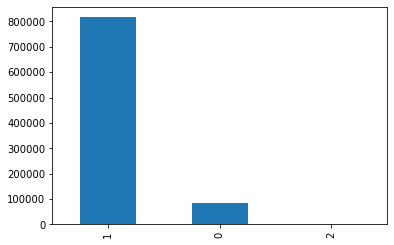

In [19]:
#plotting the metropolitan statistical area code for reference
df_5["MSA Code"].value_counts().plot(kind='bar')

In [20]:
#Percent Minority
#1 = >=0, <10%
#2 = >=10%, <30%
#3 = >= 30%, <100%
#9 = Missing

df_5["2010 Census Tract - % Minority"].value_counts()

2    372784
3    304030
1    222823
9       362
Name: 2010 Census Tract - % Minority, dtype: int64

<AxesSubplot:>

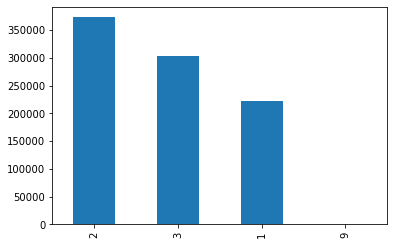

In [21]:
#plotting the percent minority 
df_5["2010 Census Tract - % Minority"].value_counts().plot(kind='bar')

In [22]:
#Tract Income Ratio
#1 = >0, <=80%
#2 = >80%, <=120%
#3 = >120%
#9 = Missing

df_5["Tract Income Ratio"].value_counts()

2    395621
3    383408
1    120302
9       668
Name: Tract Income Ratio, dtype: int64

In [23]:
#Borrower Income Ratio
#1 = >=0, <=50%
#2 = >50%, <=80%
#3 = >80%
#9 = Not Applicable

df_5["Borrower Income Ratio"].value_counts()

3    682147
2    164318
1     53508
9        26
Name: Borrower Income Ratio, dtype: int64

<AxesSubplot:>

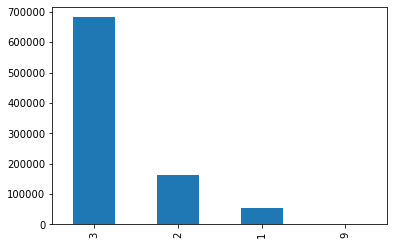

In [24]:
#plotting borrower income ratio
df_5["Borrower Income Ratio"].value_counts().plot(kind='bar')

In [25]:
#Loan to Value Ratio
#1 = >0, <=60%
#2 = >60%, <=80%
#3 = >80%, <=90%
#4 = >90%, <=95%
#5 = >95%
#9 = Missing

df_5["LTV at Origination"].value_counts()

2    436639
1    155662
4    140456
3    122604
5     44636
8         2
Name: LTV at Origination, dtype: int64

<AxesSubplot:>

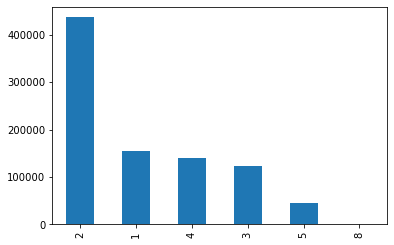

In [26]:
#plotting LTV at Origination
df_5["LTV at Origination"].value_counts().plot(kind='bar')

In [27]:
#Federal Guarantee
#1 = FHA/VA
#2 = Rural Housing Services (RHS) - guaranteed rural housing loan
#3 = Home Equity Conversion Mortgage (HECM)
#4 = No federal guarantee (conventional)
#5 = Title 1 - FHA

df_5["Federal Guarantee"].value_counts()

4    899519
2       304
1       169
5         7
Name: Federal Guarantee, dtype: int64

In [28]:
#Borrower race or national origin
#1 = American Indian or Alaska Native
#2 = Asian
#3 = Black or African American
#4 = Native Hawaiian or Other Pacific Islander
#5 = White
#6 = Two or more races
#7 = Hispanic or Latino
#9 = Not available / not applicable

df_5["Borrower Race or National Origin"].value_counts()

5    610871
9    120312
7     69787
2     51868
3     27509
6     17264
1      1400
4       988
Name: Borrower Race or National Origin, dtype: int64

<AxesSubplot:>

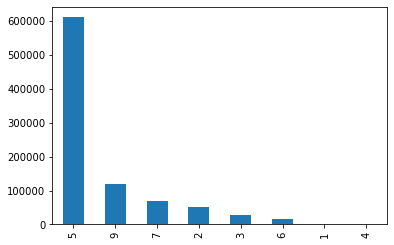

In [29]:
#plotting borrower race or national origin
df_5["Borrower Race or National Origin"].value_counts().plot(kind='bar')

In [30]:
#Borrower gender
#1 = Male
#2 = Female
#3 = info not provided
#4 = not applicable
#9 = Missing

df_5["Borrower Gender"].value_counts()

1    550517
2    275744
3     73233
4       491
9        11
5         3
Name: Borrower Gender, dtype: int64

<AxesSubplot:>

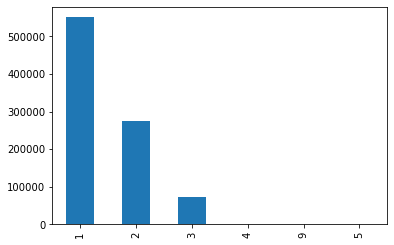

In [31]:
#plotting borrower gender
df_5["Borrower Gender"].value_counts().plot(kind='bar')

In [32]:
#Affordibility category
#1 = Low-income family (but not very low income) in a low income area
#2 = Very low-income family in a low-income area
#3 = Very low-income family not in a low-income area
#4 = other
#9 = not available

df_5["Units - Affordability Category"].value_counts()

4    811210
3     36595
1     35251
2     16910
0        26
Name: Units - Affordability Category, dtype: int64

<AxesSubplot:>

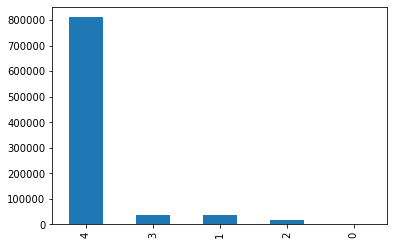

In [33]:
#plotting affordibility category
df_5["Units - Affordability Category"].value_counts().plot(kind='bar')

In [34]:
#downlading dataframe to csv for tableau
df_5.to_csv("Fannie_Freddie_Data.csv")

In [35]:
import seaborn as sns
import pandas as pd

In [42]:
#replacing values in dataset to their real names for borrower race or national origin
df_5['Borrower Race or National Origin'].mask(df_5['Borrower Race or National Origin'] == "2","Asian", inplace=True)
df_5['Borrower Race or National Origin'].mask(df_5['Borrower Race or National Origin'] == "3","Black or African American", inplace=True)
df_5['Borrower Race or National Origin'].mask(df_5['Borrower Race or National Origin'] == "4","Native Hawaiian/Pacific Islander", inplace=True)
df_5['Borrower Race or National Origin'].mask(df_5['Borrower Race or National Origin'] == "5","White", inplace=True)
df_5['Borrower Race or National Origin'].mask(df_5['Borrower Race or National Origin'] == "6","Two or More", inplace=True)
df_5['Borrower Race or National Origin'].mask(df_5['Borrower Race or National Origin'] == "7","Hispanic or Latino", inplace=True)
df_5['Borrower Race or National Origin'].mask(df_5['Borrower Race or National Origin'] == "9","Not Available", inplace=True)
df_5['Borrower Race or National Origin'].mask(df_5['Borrower Race or National Origin'] == "2","Asian", inplace=True)
df_5['Borrower Race or National Origin'].mask(df_5['Borrower Race or National Origin'] == "1","American Indian or Alaska Native", inplace=True)

Text(0, 0.5, 'No. Applications')

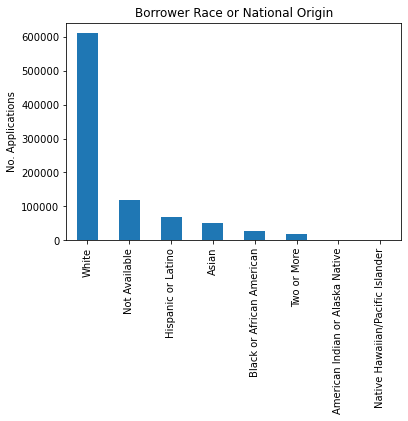

In [57]:
#plotting Borrower Race 
df_5["Borrower Race or National Origin"].value_counts().plot(kind='bar')
plt.title("Borrower Race or National Origin")
plt.ylabel("No. Applications")

In [50]:
#changing values from numbers to actual meaning in LTV at Origination
df_5['LTV at Origination'].mask(df_5['LTV at Origination'] == "1",">0, <=60%", inplace=True)
df_5['LTV at Origination'].mask(df_5['LTV at Origination'] == "2",">60, <=80%", inplace=True)
df_5['LTV at Origination'].mask(df_5['LTV at Origination'] == "3",">80, <=90%", inplace=True)
df_5['LTV at Origination'].mask(df_5['LTV at Origination'] == "4",">90, <=95%", inplace=True)
df_5['LTV at Origination'].mask(df_5['LTV at Origination'] == "5",">95%", inplace=True)
df_5['LTV at Origination'].mask(df_5['LTV at Origination'] == "8","Missing", inplace=True)

Text(0.5, 0, 'LTV % Ranges')

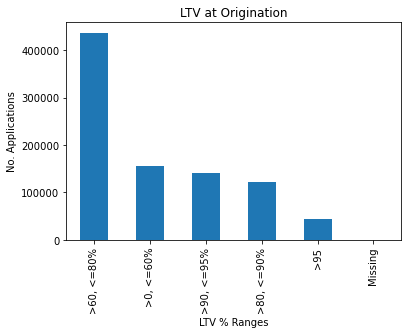

In [54]:
#plotting LTV at Origination
df_5["LTV at Origination"].value_counts().plot(kind='bar')
plt.title("LTV at Origination")
plt.ylabel("No. Applications")
plt.xlabel("LTV % Ranges")

In [55]:
#updating borrower income ratio dataframe 
df_5['Borrower Income Ratio'].mask(df_5['Borrower Income Ratio'] == "1",">0, <=50%", inplace=True)
df_5['Borrower Income Ratio'].mask(df_5['Borrower Income Ratio'] == "2",">50, <=80%", inplace=True)
df_5['Borrower Income Ratio'].mask(df_5['Borrower Income Ratio'] == "3",">80", inplace=True)
df_5['Borrower Income Ratio'].mask(df_5['Borrower Income Ratio'] == "9","Not Applicable", inplace=True)

Text(0.5, 0, 'Income Ratio % Ranges')

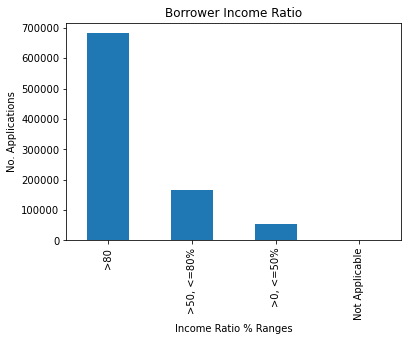

In [56]:
#plotting borrower income ratio
df_5["Borrower Income Ratio"].value_counts().plot(kind='bar')
plt.title("Borrower Income Ratio")
plt.ylabel("No. Applications")
plt.xlabel("Income Ratio % Ranges")